<a href="https://colab.research.google.com/github/justingardner/tutorials/blob/master/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning goals for the Normalization notebook. You should have already worked through the [Selectivity and tolerance](https://colab.research.google.com/drive/1-CPxtow9VNQNGpBhpMNkTLpELDkjh_Jv) notebook. After working through this notebook you will be able to...
  * decide whether threshold measurements are consistent with a Fechner logarithmic or Stevens power law
  * infer a transducer function from threshold vs stimulus strength measurements
  * create a model simple cell with normalization
  * show how normalization differs from a simple limit on how fast a neuron can spike
  * simulate non-linearities of neuronal receptive fields such as cross-orientaiton inhibition and show how divisive nomralization can account for these violations of linearity
  

In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as progressBar

Let's start with some basics. Weber's law! 

Pretty simple idea - that the just noticeable difference between, say, two weights grows as a function of the weights you are comparing. So, if you are comparing two bowling bowls, they have to differ much more in weight for you to notice the differnece then if you are trying to comapre two feathers. Fechner, Weber's student, wanted to formalize this notion, and used the following equation:

$\delta \psi = k\frac{\delta s}{s}$

Where $\psi$ is the perceptual strength, $s$ is the stimulsu strength and $k$ is a proportionality constant (which could be different for different types of judgements or different people). 

This equation always caused me some fear and loathing, not least of which comes from putting the deltas on opposite sides of the equation. Which makes me very nervous. So, let's fix that:

$\frac{\delta \psi}{\delta s} = k\frac{1}{s}$

Ok. That looks more normal, a differential equation. But, what does it mean? Well, let's answer some questions.

What is the minimum change in stimulus strength which will cause a just noticeable difference in perceptual strength?

Putting that into the notation for the equation above: What is the $\delta s$ which will cause a $\delta \psi = 1$. Note that we (somewhat) arbitratily set $\delta \psi$ to 1 to denote a "just noticeable" difference in perceptual strength. Substituting into the Fechner equation and re-arranging terms (try it!), you should get:

$\delta s = \frac{1}{k}s$

Well, that's easy enough. It's just a linear function. Let's plot it.

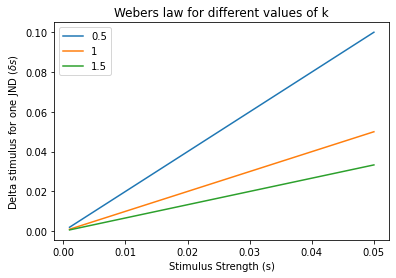

In [77]:
# parameters, we'll use a few different versions of k
k = [0.5,1,1.5]

# we will compute the function for these values of s 
s = np.linspace(0.001,0.05,1000)

# compute weber's law
ds1 = (1/k[0])*s
ds2 = (1/k[1])*s
ds3 = (1/k[2])*s

# plot functions
plt.plot(s,ds1)
plt.plot(s,ds2)
plt.plot(s,ds3)
plt.xlabel('Stimulus Strength (s)')
plt.ylabel('Delta stimulus for one JND ($\delta s$)')
plt.title('Weber''s law for different values of k')
plt.legend(k)

Simple enough, yes? Ok, let's ask another question:

What is the perceptual sensitivity to a minimal change in stimulus?

In equation terms, perceptual sensitivity is $\delta \psi$ (i.e. how much change in perceptual strength the observer experiences), and minimal change in stimulus = $\delta s$. Solving the equation above for these values, you should be able to find:

$\delta \psi = k\frac{1}{s}$

What does that look like?

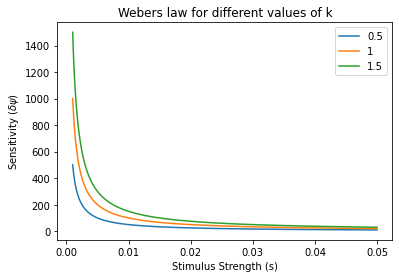

In [78]:
# compute weber's law
dpsi1 = k[0]/s
dpsi2 = k[1]/s
dpsi3 = k[2]/s

# plot functions
plt.plot(s,dpsi1)
plt.plot(s,dpsi2)
plt.plot(s,dpsi3)
plt.xlabel('Stimulus Strength (s)')
plt.ylabel('Sensitivity ($\delta \psi$)')
plt.title('Weber''s law for different values of k')
plt.legend(k)

And, just to make it clear, sensitivity is 1/threshold (or 1/just noticeable difference). That is, as you get a lower threshold, you are more sensitive to the stimulus. You can see that by, say plotting $\frac{1}{\delta s}$, which should be the same as plotting the $\delta \psi$

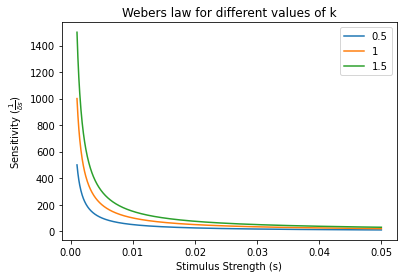

In [79]:
# plot functions
plt.plot(s,1/ds1)
plt.plot(s,1/ds2)
plt.plot(s,1/ds3)
plt.xlabel('Stimulus Strength (s)')
plt.ylabel('Sensitivity ($\\frac{1}{\delta s}$)')
plt.title('Weber''s law for different values of k')
plt.legend(k)

Ok. So Fechner's next big move, was to integrate his function for weber's law to get an expression for how perceptual strength $\psi$ grows as a function of stimulus strength $s$.

So, that goes something like this:

1) Start with Weber's law from above

$\delta \psi = k\frac{\delta s}{s}$

2)Take the integral from $s_{threshold}$ to $s$, where $s_{threshold}$ is the threshold stimulus value - that is, the point at which perceptual strength is zero and begins to grow after that

$\int_{s_{threshold}}^{s} \frac{\delta\psi}{\delta s} = k  \int_{s_{threshold}}^{s} \frac{1}{s}$

3) Note that the integral of 1/x is log(x)

$\psi|_{s_{threshold}}^{s} = k log(s)|_{s_{threshold}}^{s}$

4) Evaluate at limits

$\psi(s) - \psi(s_{threshold}) = k (log(s)-log(s_{threshold}))$

5) By definition perception at threshold, $s_{threshold}$, is zero

$\psi(s) - 0 = k (log(s)-log(s_{threshold}))$

6) Using log rules, you get Fechner's law!

$\psi(s) = k log(\frac{s}{s_{threshold}})$

What this says is the perceptual strength grows as a log of stimulus strength (after you reach the threshold stimulus strength. k is a proportionality constant.

Let's plot it!

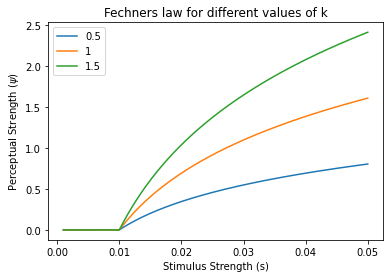

In [83]:
# set threshold
sthresh = 0.01

# compute fechner's law
psi1 = k[0]*(np.log(s/sthresh))
psi1[s<sthresh] = 0
psi2 = k[1]*(np.log(s/sthresh))
psi2[s<sthresh] = 0
psi3 = k[2]*(np.log(s/sthresh))
psi3[s<sthresh] = 0

# plot functions
plt.plot(s,psi1)
plt.plot(s,psi2)
plt.plot(s,psi3)

plt.xlabel('Stimulus Strength (s)')
plt.ylabel('Perceptual Strength ($\psi$)')
plt.title('Fechner''s law for different values of k')
plt.legend(k)

Great. That stood for like a century or something, until this upstart Steven's came in there with his rating scale measurements (asking people to rate how strong they felt a percept - everything from how strong coffee smelled to how bad an electric shock felt) and declared that Fechner was awesome, but his law needed to be repealed, in favor of a power law. Note that power laws can be compressive (like a logarithmic function above) or expanisve (which Steven's found for electric shocks - i.e. as you get to higher electric shocks, truning up the current more makes people scream more, I guess - ah, don't you miss the days before IRB's regulated what psychologists were allowed to do ;)?

So, Steven's is just saying that perceptual strength as a function of stimulus strength seems to follow power laws of the following form:

$\psi(s) = k(s-s_{threshold})^n$

Where k is a constant of proportionality and n is an exponent (that depends on what stimulus value is being tested.

Let's plot some of these.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


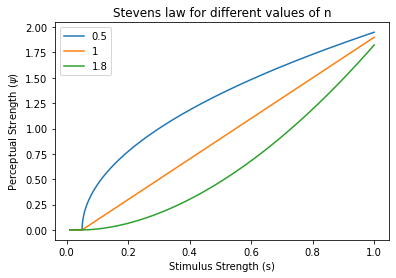

In [99]:
# parameters
sthresh = 0.05
k = 2
n = [0.5,1,1.8]
s = np.linspace(0.01,1,1000)

# compute steven's law
psi1 = k*np.power(s-sthresh,n[0])
psi1[s<sthresh] = 0
psi2 = k*np.power(s-sthresh,n[1])
psi2[s<sthresh] = 0
psi3 = k*np.power(s-sthresh,n[2])
psi3[s<sthresh] = 0

# make plot
plt.plot(s,psi1)
plt.plot(s,psi2)
plt.plot(s,psi3)
plt.xlabel('Stimulus Strength (s)')
plt.ylabel('Perceptual Strength ($\psi$)')
plt.title('Steven''s law for different values of n')
plt.legend(n)

Ok. So, different functional forms for the relationship between stimulus and perceptual strengths. Now, let's fast-forward to the 1980's and take on some date from Jacob (Jack) Nachmias who measured the threshold for different levels of contrast - a "threshold vs contrast" function. It looks (after data-thiefing from his paper) something like the following:

Text(0, 0.5, 'delta Contrast')

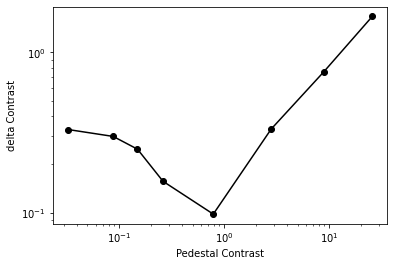

In [104]:
# data thiefed from Nachmais(1981)
contrast = [0.03262461140615300,0.08803203752373330,0.14979612843646600,0.26190210380940400,0.7876778725988400,2.802756668743720,8.85108408255861,25.62808387265430]
deltaContrast = np.array([0.3303779637359150,0.29907501132113000,0.24896837110089700,0.15700614362627300,0.09798023790343650,0.3326861622309250,0.7559803432610200,1.676324364534920])

# plot the "threshold vs contrast" curve
plt.loglog(contrast,deltaContrast,'ko-')
plt.xlabel('Pedestal Contrast')
plt.ylabel('delta Contrast')


Now, challenge for you. Use Fechner's idea of integrating the sentivity function to get the transducer function (i.e. perceptual strength vs stimulus strength) from the above data. Note, what is plotted above is threshold vs stimulus strength (not sensitivity vs stimulus strength). You will also need to use the numpy command np.cumsum to do the cumulative sum which will compute the integral.

Plot it on a semilog graph and see if it looks logarithmic.

Plot it on a loglog graph to see if it looks like a power law (remember that if you take a power law of the form $y = x^{n}$, and take the log of both sides, you get $log(y) = nlog(x)$ which will therefore plot as a line on a log-log graph, where the slope is equal to the exponent n).

Ok. If all went well, that should have produced a sigmoidal like function - and, as we discussed in class, there have been many efforts to link that sigmodial perceptual function with the sigmoidal response to contrast of neurons in cortex. Which leads us to the idea of normaliation. Remember from class, that normalization took the Naka-Rushton equation:

$Response(contrast) = \frac{contrast^{n}}{c_{50}^{n} + contrast^{n}}$

and thinks of the term $contrast^n$ in the bottom of the fraction as coming from a normalization pool of other neurons which are more broadly tuned.

Let's implement that idea directly and see how it accounts for certain non-linear aspects of neuronal firing.

First, let's import functions from the [Selectivity and tolerance](https://colab.research.google.com/drive/1-CPxtow9VNQNGpBhpMNkTLpELDkjh_Jv) notebook for computin simple cell responses and making stimuli.

In [ ]:
# function to make a mesh of x,y points
def getMeshPoints(nPoints):

  # first create a linearly spaced set of x and y points between -1 and 1
  x = np.linspace(-1,1,nPoints)
  y = np.linspace(-1,1,nPoints)

  # keep the extents for use with imshow
  extents = [np.min(x),np.max(x),np.min(y),np.max(y)]

  # now create the mesh of x and y (these will now both be 2D matrices of x and y values)
  x, y = np.meshgrid(x, y, indexing='xy')

  # and return the computed values
  return x, y, extents

# function that makes a gaussian
def makeGaussian(x,y,sigma):
  # there it is!
  gaussian = np.exp(-(x**2+y**2)/(2*sigma**2))
  
  # return 
  return gaussian

# function to make a grating
def makeGrating(x, y, orientation, spatialPhase, spatialFrequency):
  # we wil convert orientation and spatialPhase into radians
  orientation = np.pi*orientation/180
  spatialPhase = np.pi*spatialPhase/180

  # we need to convert spatial frequency into cycles/image
  # remember that we made the extents in getMeshPoints
  # to go from -1 to 1, so we want that to go from -pi to pi
  spatialFrequency = spatialFrequency * np.pi

  # make the grating
  grating = np.cos(spatialFrequency*(x*np.cos(orientation)+y*np.sin(orientation))+spatialPhase)

  # and return
  return grating

class simpleCell:
  def __init__(self,meshsize, orientationPreference, spatialPhase, spatialFrequencyPreference, exponent):
    # keep the meshsize
    self.meshsize = meshsize
    
    # first make a mesh of x,y points
    self.x, self.y, self.extents = getMeshPoints(meshsize)

    # compute the grating needed
    grating = makeGrating(self.x, self.y, orientationPreference, spatialPhase, spatialFrequencyPreference)

    # compute the gaussian (we fix the size here, but of course that could be a passed
    # in parameter)
    gaussian = makeGaussian(self.x, self.y, 0.2)

    # now we can make the gabor receptive field
    self.linearRF = grating * gaussian

    # the exponent is just something we store
    self.exponent = exponent

#function to compute the simple cell response
def computeSimpleCellResponse(simpleCell, stimulus):
  # well, the first step is to apply the linear receptive field
  # which means to take the dot product of the linear receptive field
  # and the stimulus. Note, I don't understand what numpy's dot product
  # does in 2D - so maybe there is a better way to write this. Instead
  # I'm going to go really basic here. Take the element-wise multiplication
  # of stimulus and RF and then add that all up together
  response = simpleCell.linearRF * stimulus
  response = np.sum(response)

  # since the units of the output are aribtrary, let's
  # make them a bit more intepretable where 1 would be the
  # maximum possible reponse of the RF with it's most preferred
  # stimulus. What is the most preferred stimulus, well the one
  # that exactly matches the RF!
  maxResponse = simpleCell.linearRF * simpleCell.linearRF
  maxResponse = np.sum(maxResponse)

  # now normalize by this maximum response
  response = response / maxResponse

  # now we apply a threshold
  if response<0:
    response = 0
  
  # and apply the static non-linearity
  response = response**simpleCell.exponent
  
  # and return, couldn't be simpler, no pun intended. really.
  return response

# class for a complex cell
class complexCell:
  def __init__(self, meshsize, orientationPreference, spatialFrequencyPreference):
    # keep the meshsize
    self.meshsize = meshsize
    
    # first make a mesh of x,y points
    self.x, self.y, self.extents = getMeshPoints(meshsize)

    # create the four simple cells that are needed 
    self.s000 = simpleCell(meshsize,orientationPreference,0,spatialFrequencyPreference,2)
    self.s090 = simpleCell(meshsize,orientationPreference,90,spatialFrequencyPreference,2)
    self.s180 = simpleCell(meshsize,orientationPreference,180,spatialFrequencyPreference,2)
    self.s270 = simpleCell(meshsize,orientationPreference,180,spatialFrequencyPreference,2)

# and a function that can be used to compute the response of a complex cell
def computeComplexCellResponse(complexCell, stimulus):
  # compute the response to each sub-field
  r000 = computeSimpleCellResponse(complexCell.s000, stimulus)
  r090 = computeSimpleCellResponse(complexCell.s090, stimulus)
  r180 = computeSimpleCellResponse(complexCell.s180, stimulus)
  r270 = computeSimpleCellResponse(complexCell.s270, stimulus)

  # sum together and normalize so that the maximum response is 1
  r = (r000+r090+r180+r270)/4

  # add that all together and return
  return r


Now, let's make a new class for a simple cell with normalization. It will have a receptive field for itself, plus a set of simple cell receptive fields with a distribution of different orientation tunings for its normalization pool.

In [ ]:
# class for a simple cell with normalization
class simpleCellWithNormalization:
  def __init__(self, meshsize, orientationPreference, spatialFrequencyPreference, c50):
    # keep the meshsize
    self.meshsize = meshsize
    
    # first make a mesh of x,y points
    self.x, self.y, self.extents = getMeshPoints(meshsize)

    # create the simple cell receptive field - note that we are leaving out the exponent
    # because we are going to compute that ourselves (i.e. setting exponent to 1)
    self.rf = simpleCell(meshsize,orientationPreference,0,spatialFrequencyPreference,1)

    # now create simple cells for the normalization pool
    self.nNormPool = 12
    self.normPool = []
    for i in range(0,self.nNormPool):
      # get an orientation preference
      normOrientationPreference = i*360/self.nNormPool
      # create the appropriate simple cell
      self.normPool.append(simpleCell(meshsize,normOrientationPreference,0,spatialFrequencyPreference,1))

    # here, just trying to set the range of the norm pool similarly to the simple cell response
    # maximum resonse of 1 for the best possible stimulus, so to do that, we use the same trick we have done
    # with a simple cell. We compute the best possible stimulus for one of the
    # filters (it's matched stimulus) and then hit all the other receptive fields
    # with the same stimulus and see what the summed response is. This summed
    # value should be the highest possible response you can get with the norm
    # pool. nb I'm not quite sure I have all of this right. It is possible
    # for the stimulus to give a larger response than the maxResponse - i.e. if you take the
    # preferred stimulus and up the contrast. I think the most important thing is just
    # that the response from the normalization pool is similar to the linear receptive field
    # as a function of the contrast, so that this behaves like the naka-rushton eqution
    # (i.e. if the normpool grows 10 times as fast as a function of contrast then the
    # linear receptive fields, it wouldn't be implementing c^2 / c50^2 +c^2), but would
    # be implementing c^2 / c50^2 to (10c)^2 . M
    maxResponse = []
    for i in range(0,self.nNormPool):
      maxResponse.append(computeSimpleCellResponse(self.normPool[i],self.normPool[0].linearRF))
    self.normPoolMaxResponse = np.sum(maxResponse)
  
    # Keep the c50 value
    self.c50 = c50

    # set the exponent to be 2
    self.exponent = 2


In [ ]:
Now a function to compute the simple cell response with normalization.

In [109]:
def computeSimpleCellWithNormalizationResponse(s, stimulus):
  # compute response to central receptive field
  rfResponse = computeSimpleCellResponse(s.rf, stimulus)
  
  # compute normalization pool response
  normPoolResponse = []
  for i in range(0,s.nNormPool):
    normPoolResponse.append(computeSimpleCellResponse(s.normPool[i],stimulus))

  # sum the norm pool
  normPoolResponse = np.sum(normPoolResponse)

  # and divide by the maximum response - just to get the output of the
  # normalization pool into the same range as the linear receptive field
  # see note above
  normPoolResponse = normPoolResponse / s.normPoolMaxResponse

  # compute normalized response - there it is - the Naka-Rushton equation that
  # makes this whole thing work!
  response = rfResponse**s.exponent/(s.c50**s.exponent + normPoolResponse**s.exponent)

  # return response
  return response

Ok, if all went well, then if we plot the response of this cell as a function of stimulus contrast it should be sigmoidal (what would it look like if there wasn't normalization?) and it should reach half-height at the c50 which we set to 0.1 contrast.

Text(0, 0.5, 'Response')

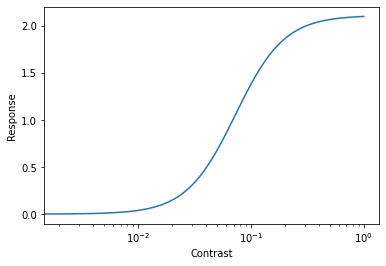

In [110]:
# parameters for the simple cell
meshsize = 64
sfPref = 4
orientPref = 90
c50 = .1

# make a simple with normalization
s = simpleCellWithNormalization(meshsize,orientPref,sfPref,c50)

# init response array
r = []

# make a grating that has the preferred orientation and spatial frequency of the model cell
stimulus = makeGrating(s.x, s.y, orientPref, 0, sfPref)

# loop over contrasts
nContrasts = 500
contrasts = np.linspace(0,1,nContrasts)
for iContrast in range(0,nContrasts):
  # compute simple cell with normalization response
  r.append(computeSimpleCellWithNormalizationResponse(s, contrasts[iContrast]*stimulus))

# plot
plt.semilogx(contrasts,r)
plt.xlabel('Contrast')
plt.ylabel('Response')

One of the important properties of normalization is that it produce contrast-invariant tuning - that means that the tuning doesn't change width as a function of contrast. Let's make sure it does that!

Computing response as a function of contrast and orientation: 100%|██████████| 5/5 [00:00<00:00, 17.36it/s]


Text(0.5, 1.0, 'Orientation tuning for various contrast levels')

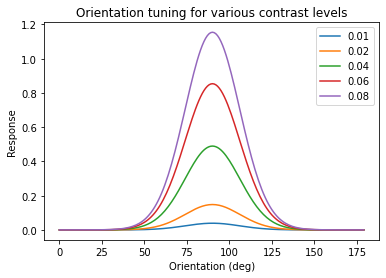

In [129]:
# init response array
nContrasts = 5
nOrientations = 180
r = np.zeros((nContrasts,nOrientations))

# loop over contrasts
contrasts = (0.01,0.02,0.04,0.06,0.08)
for iContrast in progressBar(range(0,nContrasts),desc='Computing response as a function of contrast and orientation'):

  # loop over orientations
  orientations = range(0,180,1)
  for orientation in orientations:
    # make a grating of the appropraite orientation
    stimulus = makeGrating(s.x, s.y, orientation, 0, sfPref)

    # compute simple cell with normalization response
    r[iContrast,orientation] = computeSimpleCellWithNormalizationResponse(s, contrasts[iContrast] * stimulus)

# plot
plt.plot(r.T);
plt.xlabel('Orientation (deg)')
plt.ylabel('Response')
plt.legend(contrasts)
plt.title('Orientation tuning for various contrast levels')

Ok. So, counterfactuals here. What if it were that instead of normalization, neurons just had a maximum possible firing rate they could achieve (which makes some sense). What would happen to orientation tuning as you increase contrast?

Let's implement a non-normalized version of the simple cell which maxes out its firing rate and see how that behaves.

Computing response as a function of contrast and orientation: 100%|██████████| 5/5 [00:00<00:00, 49.87it/s]


Text(0.5, 1.0, 'Orientation tuning for various contrast levels')

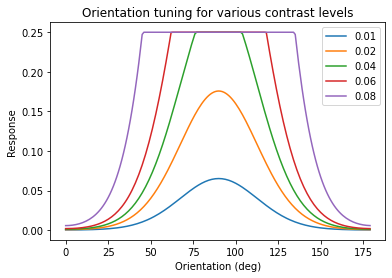

In [130]:
def computeSimpleCellWithoutNormalizationResponse(s, stimulus):
  # compute response to central receptive field
  rfResponse = computeSimpleCellResponse(s.rf, stimulus)
  
  # compute response which just maxes out at some 
  # maximum
  responseMax = 0.25
  if rfResponse > responseMax:
    response = responseMax
  else:
   response = rfResponse

  # return response
  return response

# loop over contrasts
for iContrast in progressBar(range(0,nContrasts),desc='Computing response as a function of contrast and orientation'):

  # loop over orientations
  orientations = range(0,180,1)
  for orientation in orientations:
    # make a grating of the appropraite orientation
    stimulus = makeGrating(s.x, s.y, orientation, 0, sfPref)

    # compute simple cell with normalization response
    r[iContrast,orientation] = computeSimpleCellWithoutNormalizationResponse(s, contrast[iContrast]*stimulus)

# plot
plt.plot(r.T);
plt.xlabel('Orientation (deg)')
plt.ylabel('Response')
plt.legend(contrasts)
plt.title('Orientation tuning for various contrast levels')

See the problem??

Ok. So, let's see how it handles the cross-orientation example that we saw in class. This is the behavior in which a cell responds to its preferred orientation, but doesn't respond at all to the cross-orienation (i.e. orthogonal to its preferred orientation). If superposition is to hold, if you show a plaid which is the linear combination of the preferred orientation and the cross-orientation, it should just respond like it does with the preferred orientation stimulus, but instead it is suppressed. Let's see if our model has that non-linear behavior.

Text(0, 0.5, 'Response')

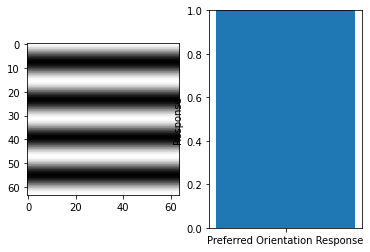

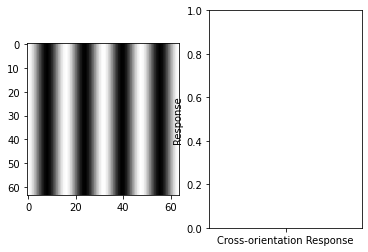

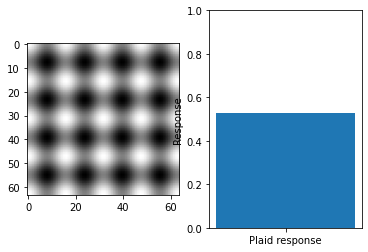

In [131]:
# make gratings of preferred and anti-preferred orientations at half-contrast
stimulusPref = 0.5 * makeGrating(s.x, s.y, orientPref, 0, sfPref)
stimulusAntiPref = 0.5 * makeGrating(s.x, s.y, orientPref+90, 0, sfPref)

# compute response of simple cell
rPref = computeSimpleCellWithNormalizationResponse(s, stimulusPref)
rAntiPref = computeSimpleCellWithNormalizationResponse(s, stimulusAntiPref)
rPlaid = computeSimpleCellWithNormalizationResponse(s, stimulusPref+stimulusAntiPref)

#display stimuli and response
plt.figure()
plt.subplot(121)
plt.imshow(stimulusPref,cmap='gray')
plt.subplot(122)
plt.bar('Preferred Orientation Response',rPref)
plt.ylim(top=1,bottom=0)
plt.ylabel('Response')

plt.figure()
plt.subplot(121)
plt.imshow(stimulusAntiPref,cmap='gray')
plt.subplot(122)
plt.bar('Cross-orientation Response',rAntiPref)
plt.ylim(top=1,bottom=0)
plt.ylabel('Response')

plt.figure()
plt.subplot(121)
plt.imshow(stimulusPref+stimulusAntiPref,cmap='gray')
plt.subplot(122)
plt.bar('Plaid response',rPlaid)
plt.ylim(top=1,bottom=0)
plt.ylabel('Response')




Yup. It does. Why is that?